## US Baby Names 1880-2010
The United States Social Security Administration (SSA) has made available data on the frequency of baby names from 1880 through 2010. 

For each year of birth YYYY after 1879, we created a comma-delimited file called yobYYYY.txt. Each record in the individual annual files has the format "name,sex,number," where name is 2 to 15 characters, sex is M (male) or F (female) and "number" is the number of occurrences of the name. 

Each file is sorted first on sex and then on number of occurrences in descending order. When there is a tie on the number of occurrences, names are listed in alphabetical order. 

This sorting makes it easy to determine a name's rank. The first record for each sex has rank 1, the second record for each sex has rank 2, and so forth. 

##### There are many things you might want to do with the data set:

    • Visualize the proportion of babies given a particular name (your own, or another name) over time.
    • Determine the relative rank of a name.
    • Determine the most popular names in each year or the names with largest increases or decreases.
    • Analyze trends in names: vowels, consonants, length, overall diversity, changes in spelling, first and last letters
    • Analyze external sources of trends: biblical names, celebrities, demographic changes.

In [51]:
!head -n 10 datasets/babynames/yob1880.txt

In [52]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/Users/rck/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['table']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [53]:
path = 'datasets/babynames/yob1880.txt'
name = ['names', 'sex', 'births']

In [54]:
names1880 = pd.read_csv(path, header=None, names=name)

In [15]:
names1880

,names,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [55]:
#Files only contain names with at least 5 occurrences in each year
#Use the sum of the births column by sex as the total number of births in that year

names.groupby('sex').births.sum()

sex
F    159990140
M    162412587
Name: births, dtype: int64

#### Assemble all of the data into a single DataFrame and add a year column 

In [56]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

In [57]:
# Concatenate everything into a single DataFrame

names = pd.concat(pieces, ignore_index=True)

In [19]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [58]:
#Aggregating the data at the year and sex

total_births = names.pivot_table('births', index='year', 
                                 columns='sex', aggfunc=sum)

total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


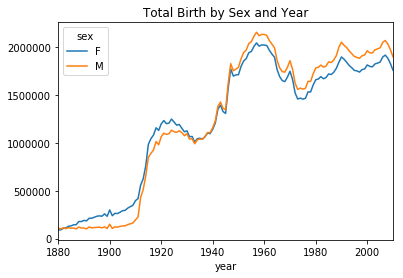

In [59]:
total_births.plot(title='Total Birth by Sex and Year')

In [60]:
def add_prop(group):
    #Interger division floors
    births = group.births.astype(float)
    
    group['prop'] = births /births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [112]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 5 columns):
name      1690784 non-null object
sex       1690784 non-null object
births    1690784 non-null int64
year      1690784 non-null int64
prop      1690784 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 64.5+ MB


In [61]:
#Do a sanity check, prop column sums to 1.

np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

#### The top 1000 names for each sex/year combination.

In [62]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [111]:
top1000.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 261877 entries, (1880, F, 0) to (2010, M, 1677645)
Data columns (total 5 columns):
name      261877 non-null object
sex       261877 non-null object
births    261877 non-null int64
year      261877 non-null int64
prop      261877 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 13.7+ MB


### Analyzing Naming Trends

In [63]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [64]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)



/Users/rck/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


In [110]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1264ae978>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12523c1d0>], dtype=object)

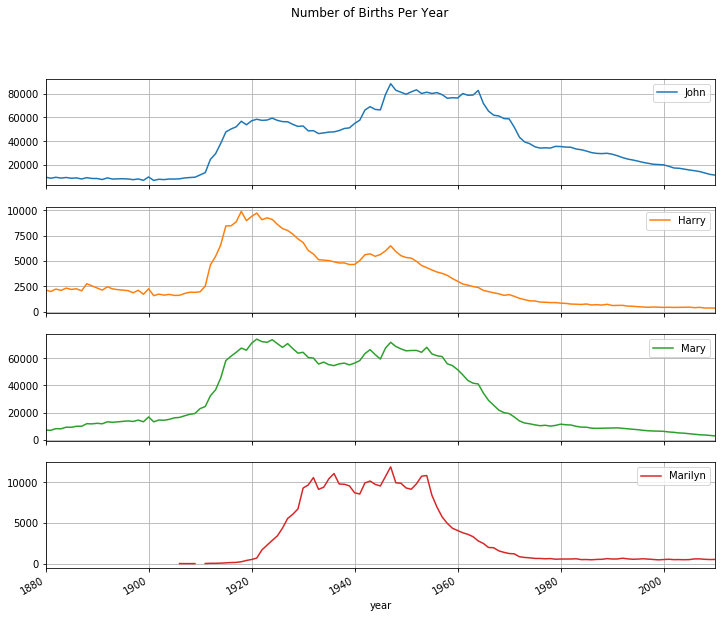

In [65]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=True,
           title="Number of Births Per Year")

### Measuring the increase in naming diversity

In [96]:
plt.figure()

In [97]:
table = top1000.pivot_table('prop', index='year',
                           columns='sex', aggfunc=sum)

/Users/rck/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
/Users/rck/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


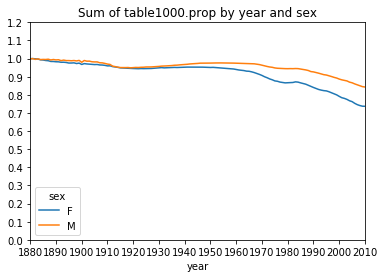

In [98]:
table.plot(title='Sum of table1000.prop by year and sex',
          yticks=np.linspace(0,1.2,13), xticks=range(1880, 2020, 10))

In [99]:
df = boys[boys.year == 2010]

In [72]:
df

name sex  births  year      prop
year sex                                                 
2010 M   1676644        Jacob   M   21875  2010  0.011523
         1676645        Ethan   M   17866  2010  0.009411
         1676646      Michael   M   17133  2010  0.009025
         1676647       Jayden   M   17030  2010  0.008971
         1676648      William   M   16870  2010  0.008887
         1676649    Alexander   M   16634  2010  0.008762
         1676650         Noah   M   16281  2010  0.008576
         1676651       Daniel   M   15679  2010  0.008259
         1676652        Aiden   M   15403  2010  0.008114
         1676653      Anthony   M   15364  2010  0.008093
         1676654       Joshua   M   15238  2010  0.008027
         1676655        Mason   M   14728  2010  0.007758
         1676656  Christopher   M   14135  2010  0.007446
         1676657       Andrew   M   14093  2010  0.007424
         1676658        David   M   14042  2010  0.007397
         1676659      Matthew   M   13954  2010  0.007350
         1676660        Logan   M   13943  2010  0.007345
         1676661       Elijah   M   13735  2010  0.007235
         1676662        James   M   13714  2010  0.007224
         1676663       Joseph   M   13657  2010  0.007194
         1676664      Gabriel   M   12722  2010  0.006701
         1676665     Benjamin   M   12280  2010  0.006469
         1676666         Ryan   M   11886  2010  0.006261
         1676667       Samuel   M   11776  2010  0.006203
         1676668      Jackson   M   11693  2010  0.006159
         1676669         John   M   11424  2010  0.006018
         1676670       Nathan   M   11269  2010  0.005936
         1676671     Jonathan   M   11028  2010  0.005809
         1676672    Christian   M   10965  2010  0.005776
         1676673         Liam   M   10852  2010  0.005716
...                       ...  ..     ...   ...       ...
         1677617         Yair   M     201  2010  0.000106
         1677616        Talan   M     201  2010  0.000106
         1677614        Keyon   M     201  2010  0.000106
         1677613         Kael   M     201  2010  0.000106
         1677618     Demarion   M     200  2010  0.000105
         1677619       Gibson   M     200  2010  0.000105
         1677620       Reagan   M     200  2010  0.000105
         1677621    Cristofer   M     199  2010  0.000105
         1677622       Daylen   M     199  2010  0.000105
         1677623       Jordon   M     199  2010  0.000105
         1677624      Dashawn   M     198  2010  0.000104
         1677625        Masen   M     198  2010  0.000104
         1677629        Rowen   M     197  2010  0.000104
         1677631       Yousef   M     197  2010  0.000104
         1677630     Thaddeus   M     197  2010  0.000104
         1677628        Kadin   M     197  2010  0.000104
         1677627       Dillan   M     197  2010  0.000104
         1677626     Clarence   M     197  2010  0.000104
         1677634        Slade   M     196  2010  0.000103
         1677632      Clinton   M     196  2010  0.000103
         1677633      Sheldon   M     196  2010  0.000103
         1677636      Keshawn   M     195  2010  0.000103
         1677637     Menachem   M     195  2010  0.000103
         1677635       Joziah   M     195  2010  0.000103
         1677638       Bailey   M     194  2010  0.000102
         1677639       Camilo   M     194  2010  0.000102
         1677640       Destin   M     194  2010  0.000102
         1677641       Jaquan   M     194  2010  0.000102
         1677642       Jaydan   M     194  2010  0.000102
         1677645       Maxton   M     193  2010  0.000102

[1000 rows x 5 columns]

In [116]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [117]:
prop_cumsum[:10]

year  sex       
1900  M    54492    0.065319
           54493    0.122308
           54494    0.170437
           54495    0.206338
           54496    0.233584
           54497    0.259003
           54498    0.283672
           54499    0.306767
           54500    0.324854
           54501    0.342163
Name: prop, dtype: float64

In [118]:
prop_cumsum.values.searchsorted(0.5)

24

In [122]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

In [123]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

/Users/rck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """
/Users/rck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """


In [124]:
fig = plt.figure()

In [126]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


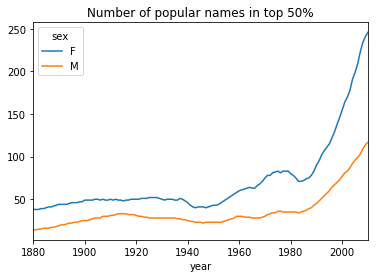

In [127]:
#girl names have always been more diverse than boy names, and they have only become more so over time

diversity.plot(title="Number of popular names in top 50%")

### The “Last letter” Revolution

##### Check if the distribution of boy names by final letter has changed significantly over the last 100 years



In [129]:
#Extract last letter from the name column

get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.names = 'last_letter'

table = names.pivot_table('births', 
                          index=last_letters, 
                          columns=['sex', 'year'], aggfunc=sum)

In [130]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [131]:
subtable.head()

sex          F                            M                    
year      1910      1960      2010     1910      1960      2010
name                                                           
a     108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b          NaN     694.0     450.0    411.0    3912.0   38859.0
c          5.0      49.0     946.0    482.0   15476.0   23125.0
d       6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e     133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [132]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [133]:
letter_prop = subtable /subtable.sum().astype(float)

In [134]:
import matplotlib.pyplot as plt

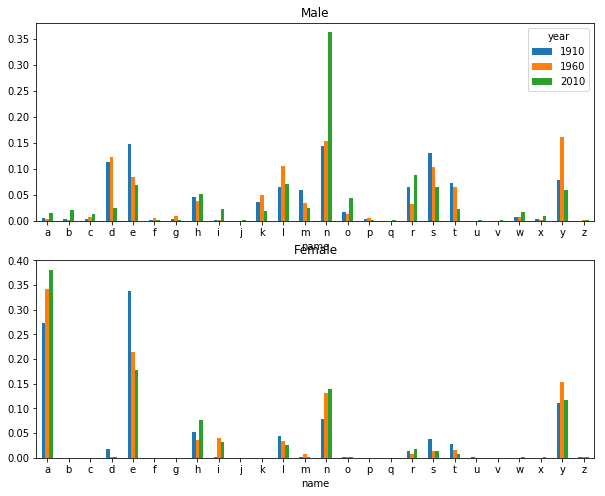

In [135]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8)) 
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male') 
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [136]:
letter_prop = table / table.sum().astype(float)

In [137]:
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T

/Users/rck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [138]:
dny_ts.head()

name,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


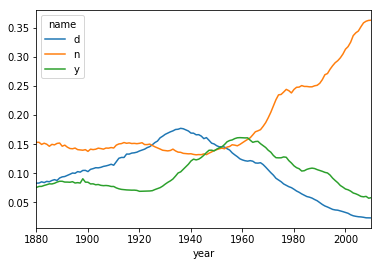

In [139]:
#boy names ending in “n” have experienced significant growth since the 1960s.
dny_ts.plot()

#### Boy names that became girl names (and vice versa)

In [141]:
#Check names that “changed sexes” to the present
#example: Lesley or Leslie.

all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]

In [142]:
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [144]:
#filter down to just those names and sum births grouped by name

filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [145]:
#Aggregate by sex and year and normalize within year
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')

/Users/rck/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
/Users/rck/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


In [146]:
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


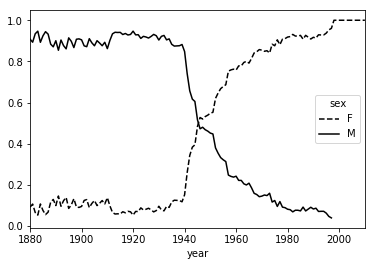

In [150]:
#plot of the breakdown by sex over time
table.plot(style={'M':'k-', 'F':'k--'})